<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Neuroscience of Learning, Memory, Cognition <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 1 <br>
<font color=696880 size=4>

**Name: Armin Navardi**

**Student Number: 99105129**


# LFP data

What is LFP (Local Field Potential) signal? Explain briefly  (5 points)

Your answer:  LFP refers to electrical signals generated in nerves and other tissues. These signals result from the summed electrical activity of individual neurons within that tissue. LFPs are extracellular, meaning they arise from transient ion concentration imbalances outside the cells.
LFPs are local because they are recorded by an electrode placed near the generating cells. These electrodes can only detect potentials within a limited spatial radius.

What is Gamma frequency entrainment? Explain (5 points)

Your answer: Gamma frequency entrainment involves synchronizing brainwaves to a specific frequency, which can have various effects on mood, memory, and cognition. Gamma waves are high-frequency brain oscillations that occur at approximately >30 Hz, and they play a crucial role in cognitive function.

Study about Gamma frequency entrainment's effect on the subject. Explain how it affects the brain. (This article could be useful: Gamma frequency entrainment attenuats amyloid load and modifies microglia)  (5 points)


Your answer: Decreased gamma oscillation has been associated with cognitive declines in neurological diseases, such as memory dysfunction in Alzheimer’s disease. Studies have attempted to artificially induce gamma oscillations by using 40 Hz sensory entrainment stimulation. These studies reported attenuation of amyloid load, hyper-phosphorylation of tau protein, and improvement in overall cognition in both AD patients and mouse models.

There is an LFP_data file in the zip file, which is located in the CW. This data is related to an experiment with 120 trials and 3 different brain regions of a rat. Each trial consists of 6000 samples, and the sample rate is 2000, resulting in 3 seconds of data per trial. Within this file, there is a channelData matrix that contains recorded data for each region. Additionally, there is a digitalByte vector that specifies when trials began and ended using pulses with an amplitude of 128. Open the file, print the size of the digitalByte and channelData, and then plot the digitalByte.  (5 points)

In [1]:
# import all the necessary libraries here
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

fs = 2000
digitalByte shape: (1495741, 1)
channelData shape: (1495741, 3)


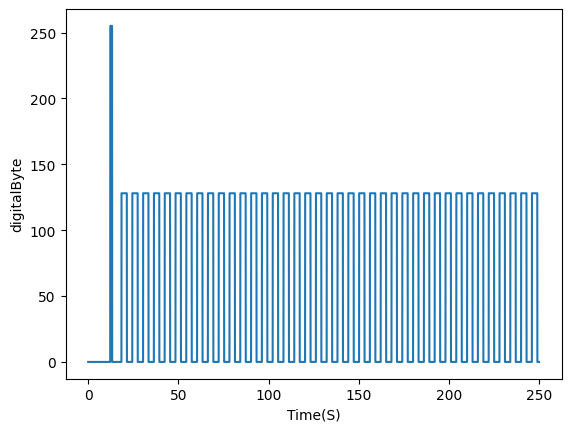

In [10]:
# Load the data from the file provided
#############################
# Your code goes here
import scipy.io

# Loading data
session_data = scipy.io.loadmat("sessionData.mat")

fs = session_data['SampleRate'][0, 0]
data = session_data['channelData']
db = session_data['digitalByte']
time = session_data['time'].T

#############################
print(f"fs = {fs}")
print(f"digitalByte shape: {db.shape}")
print(f"channelData shape: {data.shape}")

plt.plot(time[:500000], db[:500000])
plt.xlabel('Time(S)')
plt.ylabel('digitalByte')
plt.show()

# Pre-processing of the data

Now we want to pre process our data. Follow the following steps and explain why we do them:  (points 20)

1. Apply a bandpass filter in the range 1-300 Hz on the signal of each region.

2. Convert the signal to 120 stimulus trials using digitalByte.

3. Apply z-score normalization on each trial.


1. The bandpass filter is used to remove unwanted frequency components from the signal while retaining the relevant frequency range.
Low frequencies (Below 1 Hz) often include baseline drift, electrode artifacts, and other slow variations that are not related to the neural activity of interest. Removing them helps clean up the signal.
High frequencies (Above 300 Hz) can be due to noise, muscle artifacts, or other high-frequency interference.

2. This step involves segmenting the continuous signal into discrete trials corresponding to specific stimuli or events. By dividing the signal into trials, we can analyze neural responses to stimuli.

3. Different trials may have varying amplitudes due to electrode placement, subject variability, or other factors. Normalizing ensures that all trials are on the same scale.

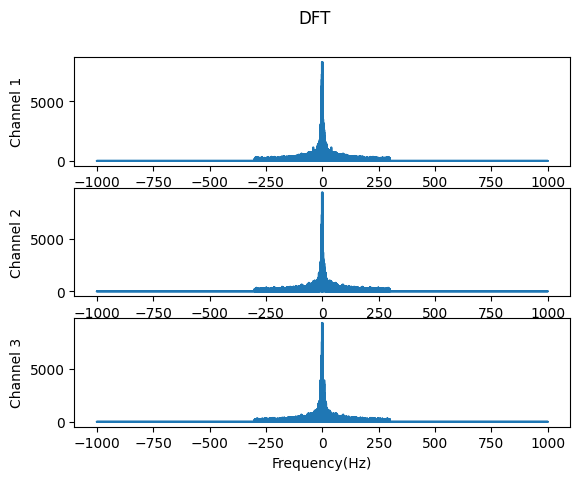

In [39]:
# preprocess
def bandpass_filter(data, low_freq, high_freq):
    # Apply a band pass filter on the data
    #############################
    # Your code goes here
    f = sp.fftpack.fftfreq(data.shape[0], d=1/fs)
    fft_signal = sp.fftpack.fft(data, axis=0)

    fft_signal[high_freq < np.abs(f)] = 0
    fft_signal[(np.abs(f) < low_freq)] = 0


    data_filtered = np.abs(sp.fftpack.ifft(fft_signal, axis=0))

    plt.subplot(3, 1, 1)
    plt.plot(f, abs(fft_signal[:,0]))
    plt.ylabel('Channel 1')
    plt.xlabel('Frequency(Hz)')
    plt.subplot(3, 1, 2)
    plt.plot(f, abs(fft_signal[:,1]))
    plt.ylabel('Channel 2')
    plt.xlabel('Frequency(Hz)')
    plt.subplot(3, 1, 3)
    plt.plot(f, abs(fft_signal[:,2]))
    plt.ylabel('Channel 3')
    plt.xlabel('Frequency(Hz)')
    plt.suptitle('DFT')
    plt.show()

    return data_filtered
    #############################
    pass



def convert_to_trials(data):
    # Extract the trials of the signal
    #############################
    # Your code goes here
    start_trials = np.nonzero(db - np.roll(db, 1))[0]
    trials = np.zeros([120, 6000, 3])

    for i in range(1, 121):
      trials[i-1, :, :] = data[start_trials[2*i]: start_trials[2*i]+6000]

    return trials
    #############################
    pass



def z_score(data):
    # Calculate the z_score for the data and return the results
    #############################
    # Your code goes here
    mean = np.mean(data, axis=1, keepdims=True)
    std = np.std(data, axis=1, keepdims=True)

    normal_data = (data - mean)/(std + 0.00001)
    return normal_data
    #############################
    pass


data_filtered = bandpass_filter(data, 1, 300)
trials = convert_to_trials(data_filtered)
normal_data = z_score(trials)



 The three regions represented in the data, respectively, are the Hippocampus, the mPFC (medial Prefrontal Cortex), and the Ventral Striatum. Explain functionality of these regions briefly.  (10 points)

Your answer:
The Hippocampus plays a crucial role in learning and forming new memories. It helps consolidate information from short-term memory to long-term memory. Also, the hippocampus is essential for episodic memory, which involves remembering specific events and experiences.

The mPFC is involved in executive functions, such as planning, decision-making, and self-control.Also, It plays a role in understanding social cues, empathy, and theory of mind. In addition It contributes to working memory, allowing us to hold and manipulate information temporarily.

The ventral striatum is a key player in the reward system. It processes rewarding stimuli and motivates behavior.It receives input from the midbrain dopamine system and releases dopamine during rewarding experiences.

What is ERP of a neural signal ? Calculate the ERP of given data for each region and plot it(set title for x, y axes.)  (10 points)

Your answer: ERPs occur in response to specific events, such as the presentation of visual, auditory, or tactile stimuli.
They reflect the synchronized activity of cortical neurons related to these events. ERPs are extracted using averaging techniques.
Researchers record multiple trials of the same event and average the responses to enhance the signal-to-noise ratio.

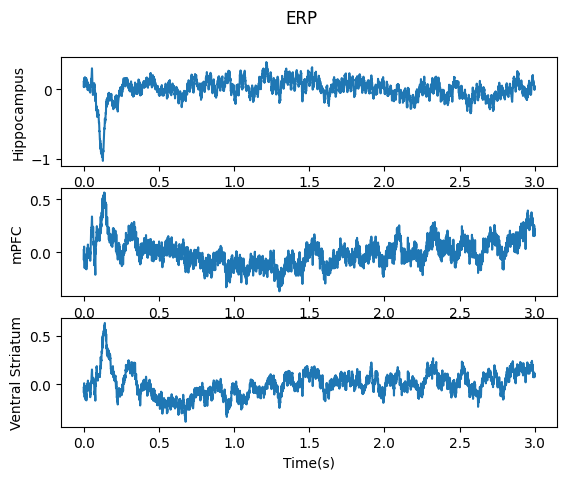

In [85]:
#ERP calculation
def ERP_calc(trial_data):
    # Calsulate the ERP of the data
    #############################
    # Your code goes here
    erp = np.mean(trial_data, 0)

    return erp
    #############################
    pass


trials_raw = z_score(convert_to_trials(data))
erp = ERP_calc(trials_raw)

t = np.arange(len(erp))/fs
plt.subplot(3, 1, 1)
plt.plot(t, erp[:, 0])
plt.ylabel('Hippocampus')
plt.xlabel('Time(s)')
plt.subplot(3, 1, 2)
plt.plot(t, erp[:, 1])
plt.ylabel('mPFC')
plt.xlabel('Time(s)')
plt.subplot(3, 1, 3)
plt.plot(t, erp[:, 2])
plt.ylabel('Ventral Striatum')
plt.xlabel('Time(s)')
plt.suptitle('ERP')
plt.show()



# Entrainment and some processing techniques

Now we want to observe the effect of the entrainment on the LFP signal.

1. Write a function which takes a signal and it's respective sample rate and calculate it's PSD. (Hint: You can use some specific modules of the mentioned libraries.)

2. Write a function that takes the trials of a signal, calculates the PSD (using part 1) of each trial, and averages these PSDs. We refer to this averaged PSD as the ERSP. Draw ERSP  of Hippocampus, mPFC and Ventral Striatum (set legend, x and y title.) Explain your results.  (20 points)

The ERSPs of all regions are descending and have a smooth shape. Additionally, all 3 ERSPs exhibit similar values. All ERSPs have close values. Theres a small peak at 40Hz.

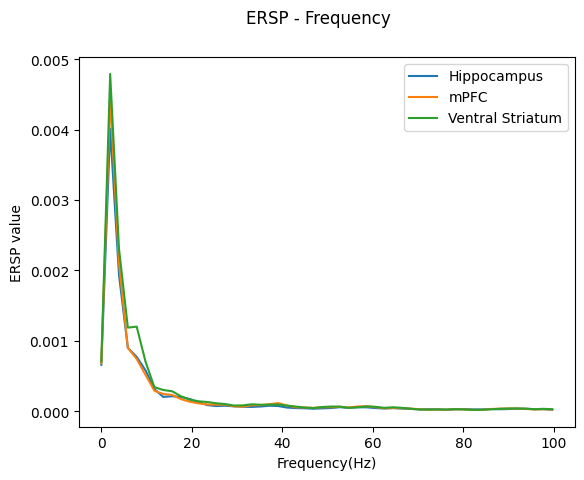

In [86]:
# ERSP calculation
def PSD(data, sample_rate):
    # Calsulate the PSD of the data
    #############################
    # Your code goes here
    f, Pxx = sp.signal.welch(data, fs, axis=-2, nperseg=1024)
    #############################
    return f, Pxx
    pass

def ERSP(trials):
    # Calsulate the ERSP of the data
    #############################
    # Your code goes here
    Pxx = np.zeros([len(trials), 513, 3])
    for i in range(len(trials)):
      f, Pxx[i] = sp.signal.welch(data, fs, axis=-2, nperseg=1024)

    ersp = np.mean(Pxx, 0)

    return f, ersp
    #############################
    pass


f, ersp = ERSP(trials_raw)
ersp = ersp[f<100]
f = f[f<100]

plt.plot(f, ersp[:, 0], label='Hippocampus')
plt.plot(f, ersp[:, 1], label='mPFC')
plt.plot(f, ersp[:, 2], label='Ventral Striatum')
plt.ylabel('ERSP value')
plt.xlabel('Frequency(Hz)')
plt.suptitle('ERSP - Frequency')
plt.legend()
plt.show()

Draw PSD of ERP for each region and compare results to ERSPs.(PSDs should be in the same plot. Set legend and proper labels)  (10 points)

The PSD of the ERP exhibits a high peak at 40 Hz and a smaller peak at 80 Hz. In contrast, the ERSP appears smoother than the PSD of the ERP. Additionally, there is a significant difference in the PSD of the ERP across different regions, whereas the ERSPs remain approximately consistent.”

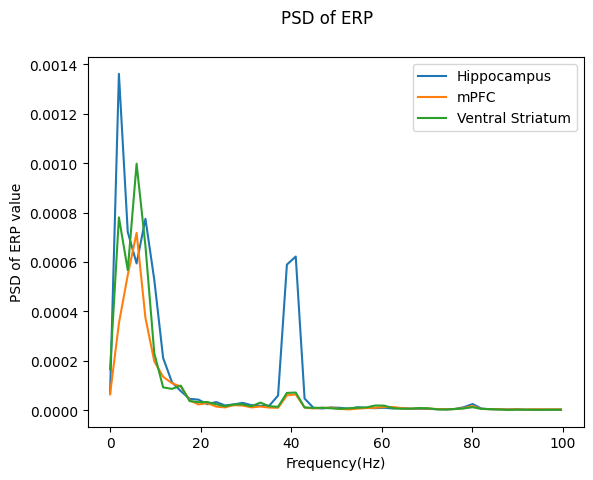

In [99]:
#ERSPs vs PSD of ERPs
#############################
# Your code goes here
f, psd_erp = PSD(erp, fs)

psd_erp = psd_erp[f<100]
f = f[f<100]

plt.plot(f, psd_erp[:, 0], label='Hippocampus')
plt.plot(f, psd_erp[:, 1], label='mPFC')
plt.plot(f, psd_erp[:, 2], label='Ventral Striatum')
plt.xlabel('Frequency(Hz)')
plt.ylabel('PSD of ERP value')
plt.suptitle('PSD of ERP')
plt.legend()
plt.show()
#############################

Functional connectivity (FC) refers to the temporal correlations between spatially remote neurophysiological events. In simpler terms, it’s about how different brain regions communicate and synchronize their activity. Phase-phase coupling is one of the most important types of the FC. Study about PLV and PLI, explain how they are work and compare them. (This article could be useful: Phase lag index: Assessment of functional connectivity from multi channel EEG and MEG with diminished bias from common sources. in this article PLV mentioned as mean phase coherency)  (10 points)

Your answer: PLV quantifies the synchronization strength between two brain regions by measuring the consistency of their phase differences over time. PLV computes the mean phase coherence across trials or epochs. It considers the phase angles of oscillatory signals at each time point.
PLI focuses on the directionality of phase differences between brain regions. It considers only the sign of the phase lag (positive or negative).

PLV emphasizes coherence, while PLI emphasizes directionality.
PLV is sensitive to volume conduction, whereas PLI mitigates this issue.
PLI is less affected by noise.
PLV may yield more connections due to its sensitivity.
PLI provides a more conservative estimate of connectivity.
Both PLV and PLI have a value between 0 and 1. For asynchronous signals both are 0 and for synchronous signals both are 1.

$$PLV_{X,Y} = |\frac{1}{N} \sum_{t=1}^Ne^{\Phi_{X,Y}(t)}|$$
$$PLI_{X,Y} = |\frac{1}{N} \sum_{t=1}^Nsign(\Phi_{X,Y}(t))|$$

(Bonus) Study about wPLI. Explain the differences between wPLI and PLI. Suggest a code to calculate wPLI and plot the results. You may use the functions that you have already defined.(Set x,y label and legend)  (25 points)

wPLI extends PLI by additionally accounting for the magnitude of the phase difference. It weights phase differences based on their actual values.
wPLI is less affected by noise and volume conduction.
$$wPLI_{X,Y} = \frac{|\sum_{t=1}^N Imag(S_{X,Y}(t))|}{\sum_{t=1}^N |Imag(S_{X,Y}(t))|} $$

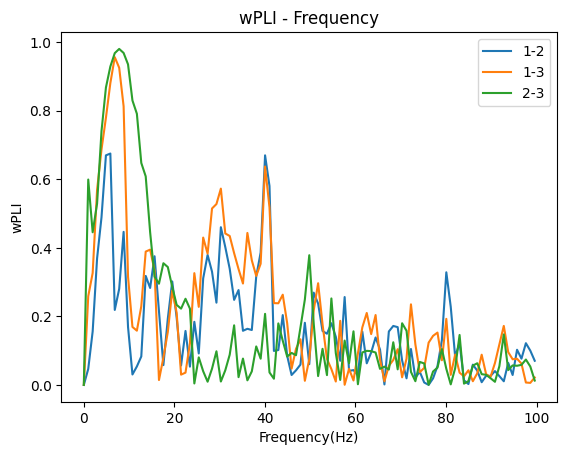

In [98]:
# WPLI
def WPLI(trials):
    #############################
    # Your code goes here
    n_channels = trials.shape[-1]

    wpli = np.zeros([3, n_channels])
    nperseg = 2048
    sum_imag = np.zeros([int(nperseg/2)+1, 3, 3])
    sum_abs = np.zeros([int(nperseg/2)+1, 3, 3])

    for t in range(120):
      for i in range(n_channels):
        for j in range(n_channels):
          f, Pxy = sp.signal.csd(trials[t, :, i], trials[t, :, j], fs, nperseg=nperseg)

          sum_imag[:, i, j] += np.imag(Pxy)
          sum_abs[:, i, j] += np.abs(np.imag(Pxy))

    f = f.T
    wpli = np.abs(sum_imag)/(sum_abs + 0.01)

    #############################
    return f, wpli


f, wpli = WPLI(trials_raw)
wpli = wpli[f<100]
f = f[f<100]

plt.plot(f, wpli[:, 0, 1], label='1-2')
plt.plot(f, wpli[:, 0, 2], label='1-3')
plt.plot(f, wpli[:, 1, 2], label='2-3')
plt.xlabel('Frequency(Hz)')
plt.ylabel('wPLI')
plt.title('wPLI - Frequency')
plt.legend()
plt.show()